# Adaline (Adaptive Linear Neuron)

Adaline has been implemented using gradient descent. Cost function beahvior is tested for different learning rates for normalized and non-normalized data. 

In [41]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap

# Generate Random Training Data

Genering 200 data points with 2 features.100 with label -1 and 100 with label 1. The data is generated using python random library with the uniform() function. The value range for either of the labels may be modified easily by changing min1, max1, min2 and max2 values. The number of data points may be changed by changing the count value. Default values have been set to 100.

In [3]:
def data_gen(min1, max1, min2, max2, label, count):
    X = []
    y = []
    for i in range(count):
        X.append([random.uniform(min1,max1),
                     random.uniform(min2,max2)])
        y.append(label)
    return X,y

Features shape (200, 2)
Labels shape (200,)


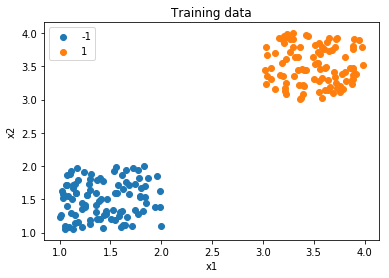

In [4]:
X, y = data_gen(min1 = 1 ,max1 = 2,
                  min2 = 1,max2 = 2,
                  label = -1,count = 100)
X2, y2 = data_gen(min1 = 3, max1 = 4,
                 min2 = 3, max2 = 4,
                 label=1, count = 100)
X = np.array(X)
X2 = np.array(X2)
X = np.concatenate((X,X2),axis=0)
y2 = np.array(y2)
y = np.array(y)
y = np.append(y,y2)
print("Features shape", X.shape)
print("Labels shape", y.shape)

plt.scatter(X[:100,0],X[:100,1],label='-1')
plt.scatter(X[100:200,0],X[100:200,1],label='1')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='upper left')
plt.title("Training data")
plt.show()

# Generate Random Test Data

The test data has been made with the two clusters having more variance to find out how well the Perceptron model has fitted the line between the two clusters. The test data size is set to 100.

Features shape (100, 2)
Labels shape (100,)


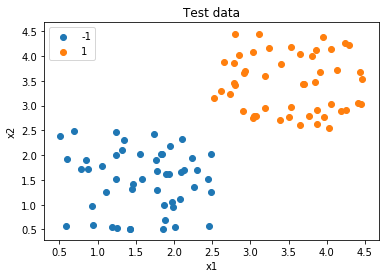

In [5]:
X_test, y_test = data_gen(min1 = 0.5 ,max1 = 2.5,
                  min2 = 0.5,max2 = 2.5,
                  label = -1,count = 50)
X2_test, y2_test = data_gen(min1 = 2.5, max1 = 4.5,
                 min2 = 2.5, max2 = 4.5,
                 label=1, count = 50)
X_test = np.array(X_test)
X2_test = np.array(X2_test)
X_test = np.concatenate((X_test,X2_test),axis=0)
y2_test = np.array(y2_test)
y_test = np.array(y_test)
y_test = np.append(y_test,y2_test)
print("Features shape", X_test.shape)
print("Labels shape", y_test.shape)

plt.scatter(X_test[:50,0],X_test[:50,1],label='-1')
plt.scatter(X_test[50:100,0],X_test[50:100,1],label='1')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc='upper left')
plt.title("Test data")
plt.show()

# Adaline
Adaline cost function is calculated using sum of squared errors
$$
J(\vec{w})=\frac{1}{2}\sum_{i=1}^{n}(y[i]-\phi(\vec{w}^T\vec{x}))^2
$$
where $\phi(z)=\vec{w}^T\vec{x}$ is the identity function of the net input.
The weights are updated by using gradient descent
$$
\vec{w}:=\vec{w}+\Delta\vec{w}=\vec{w}-\eta\nabla
J(\vec{w})
$$

In [6]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

# Cost Evaluation
Different learning rates are plotted to visualize a good learning rate for predicting the random data. The learning rates are changed by
$$
\frac{0.1}{3^i}
$$
where $i={1,2,...,n}$.

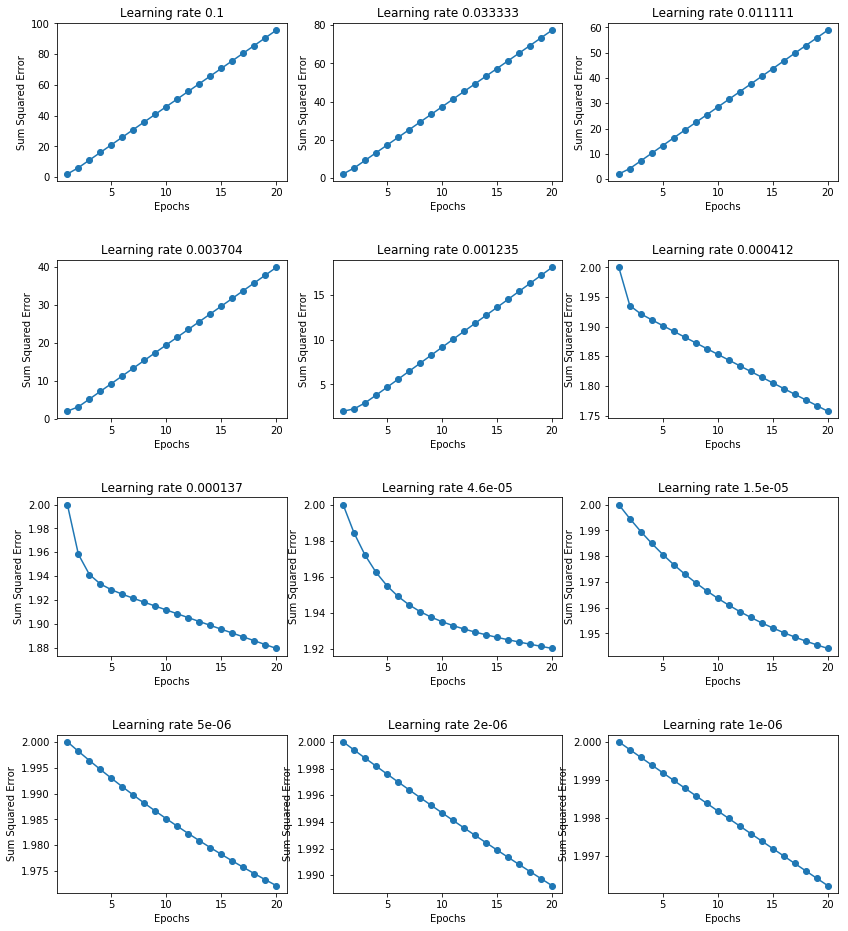

In [8]:
n = 12
adalines = [0]*n
figsize = (14,16)
cols = 3
gs = gridspec.GridSpec(len(adalines) // cols , cols)
gs.update(hspace=0.5)
fig1 = plt.figure(num=1, figsize=figsize)
ax = []

for i in range(n):
    learning_rate = 0.1/3**i
    adalines[i] = AdalineGD(n_iter=20, eta=learning_rate).fit(X,y)
    row = (i // cols)
    col = i % cols
    ax.append(fig1.add_subplot(gs[row, col]))
    ax[-1].set_title('Learning rate %s' % str(round(learning_rate,6)))
    ax[-1].set_ylabel('Sum Squared Error')
    ax[-1].set_xlabel('Epochs')
    ax[-1].plot(range(1, len(adalines[i].cost_) + 1), np.log10(adalines[i].cost_), marker='o')
plt.show()

Based on the sum squared errors for different learning rates a learning rate of approximately 0.0004 is close to optimal.

# Cost Evaluation with Standardization

3


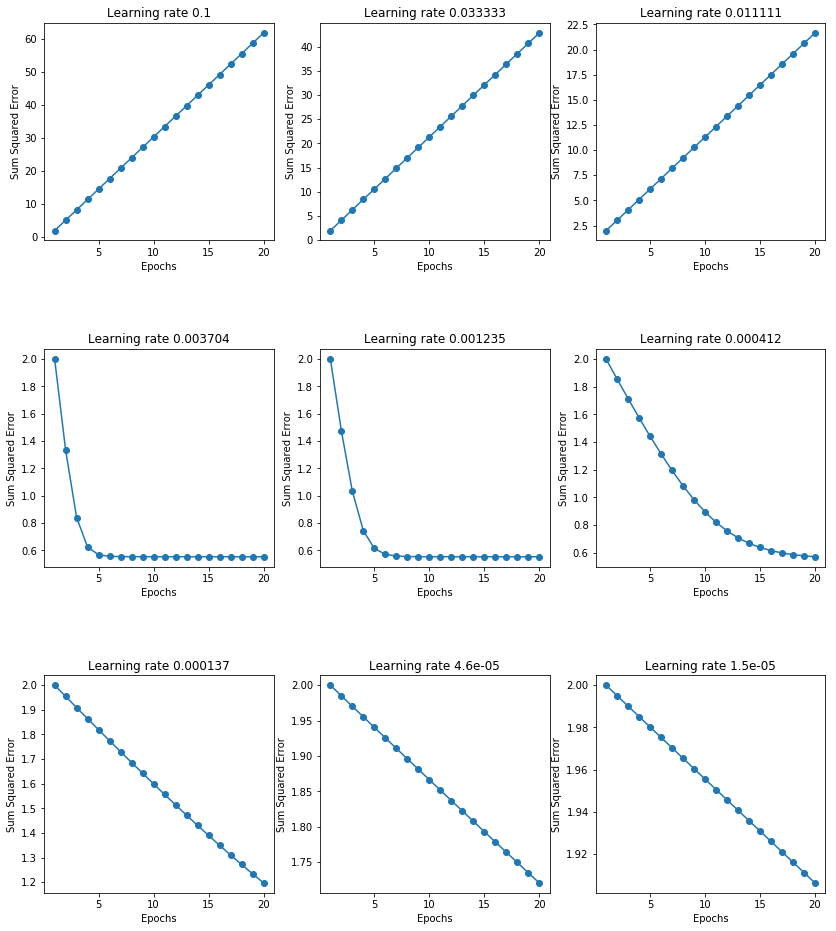

In [36]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

n = 9
adalines2 = [0]*n
figsize = (14,16)
cols = 3
print(len(adalines2)//cols)
gs = gridspec.GridSpec(len(adalines2)//cols , cols)
gs.update(hspace=0.5)
fig2 = plt.figure(num=1, figsize=figsize)
ax2 = []

for i in range(n):
    learning_rate = 0.1/3**i
    adalines2[i] = AdalineGD(n_iter=20, eta=learning_rate).fit(X_std,y)
    row = (i // cols)
    col = i % cols
    ax2.append(fig2.add_subplot(gs[row, col]))
    ax2[-1].set_title('Learning rate %s' % str(round(learning_rate,6)))
    ax2[-1].set_ylabel('Sum Squared Error')
    ax2[-1].set_xlabel('Epochs')
    ax2[-1].plot(range(1, len(adalines2[i].cost_) + 1), np.log10(adalines2[i].cost_), marker='o')
plt.show()

With standardized data 0.0037 appears to be a good learning rate.

In [9]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

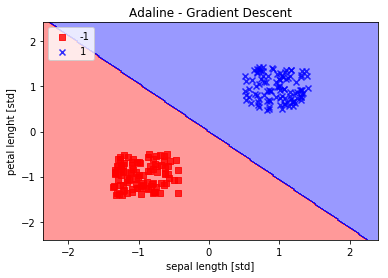

In [39]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
ada = AdalineGD(n_iter=15, eta=0.0037).fit(X_std,y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [std]')
plt.ylabel('petal lenght [std]')
plt.legend(loc='upper left')
plt.show()